<a href="https://colab.research.google.com/github/PyAshishMhatre/Channel-Analysis-using-Youtube-Data-API/blob/main/YoutubeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset 

In [2]:
channeldf = pd.read_csv('/content/ChannelData.csv', index_col='Unnamed: 0')

# Working on Channel Data 

In [3]:
channeldf.head()

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Marques Brownlee,2008-03-21T15:25:54Z,US,UUBJycsmduvYEL83R_U4JriQ,2855578687,15200000,1410
1,Linus Tech Tips,2008-11-25T00:46:52Z,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,5425641560,14300000,5614
2,Austin Evans,2007-08-05T01:39:45Z,US,UUXGgrKt94gR6lmN4aN3mYTg,1183104884,5220000,1788
3,UrAvgConsumer,2012-01-01T23:54:16Z,US,UU9fSZHEh6XsRpX-xJc6lT3A,453544303,3160000,1005
4,Mrwhosetheboss,2011-04-20T12:10:24Z,GB,UUMiJRAwDNSNzuYeN2uWa0pA,1491243523,9640000,1399


In [4]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Channel_name       8 non-null      object
 1   Channel_Created    8 non-null      object
 2   Channel_country    7 non-null      object
 3   Channel_uploads    8 non-null      object
 4   Channel_viewcount  8 non-null      int64 
 5   Channel_subcount   8 non-null      int64 
 6   Channel_vidcount   8 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 512.0+ bytes


Convert Date column from UTC format to MM/DD/YY format 

In [5]:
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])
channeldf['Channel_Created'] = channeldf['Channel_Created'].dt.strftime('%m/%d/%Y')
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])

In [6]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Channel_name       8 non-null      object        
 1   Channel_Created    8 non-null      datetime64[ns]
 2   Channel_country    7 non-null      object        
 3   Channel_uploads    8 non-null      object        
 4   Channel_viewcount  8 non-null      int64         
 5   Channel_subcount   8 non-null      int64         
 6   Channel_vidcount   8 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 512.0+ bytes


In [7]:
channeldf

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Marques Brownlee,2008-03-21,US,UUBJycsmduvYEL83R_U4JriQ,2855578687,15200000,1410
1,Linus Tech Tips,2008-11-25,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,5425641560,14300000,5614
2,Austin Evans,2007-08-05,US,UUXGgrKt94gR6lmN4aN3mYTg,1183104884,5220000,1788
3,UrAvgConsumer,2012-01-01,US,UU9fSZHEh6XsRpX-xJc6lT3A,453544303,3160000,1005
4,Mrwhosetheboss,2011-04-20,GB,UUMiJRAwDNSNzuYeN2uWa0pA,1491243523,9640000,1399
5,Dave2D,2015-01-05,CA,UUVYamHliCI9rw1tHR1xbkfw,664653933,3480000,642
6,Unbox Therapy,2010-12-21,NaN,UUsTcErHg8oDvUnTzoqsYeNw,4228241509,18200000,2004
7,Technical Guruji,2015-10-19,IN,UUOhHO2ICt0ti9KAh-QHvttQ,2914231863,21900000,4229


#View count comparsion

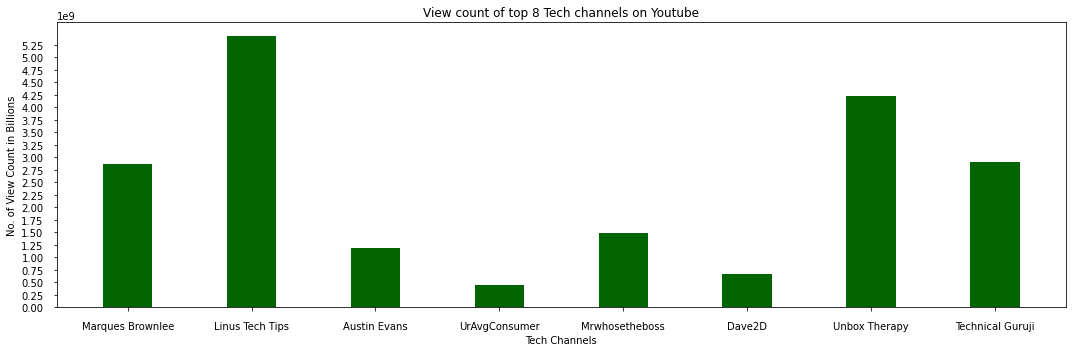

In [8]:
fig, ax = plt.subplots(figsize =(15, 5))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_viewcount'], color ='darkgreen',
        width = 0.4,)
step_value = 250000000
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of View Count in Billions")
plt.title("View count of top 8 Tech channels on Youtube")
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

#Subscriber base % compared to each other

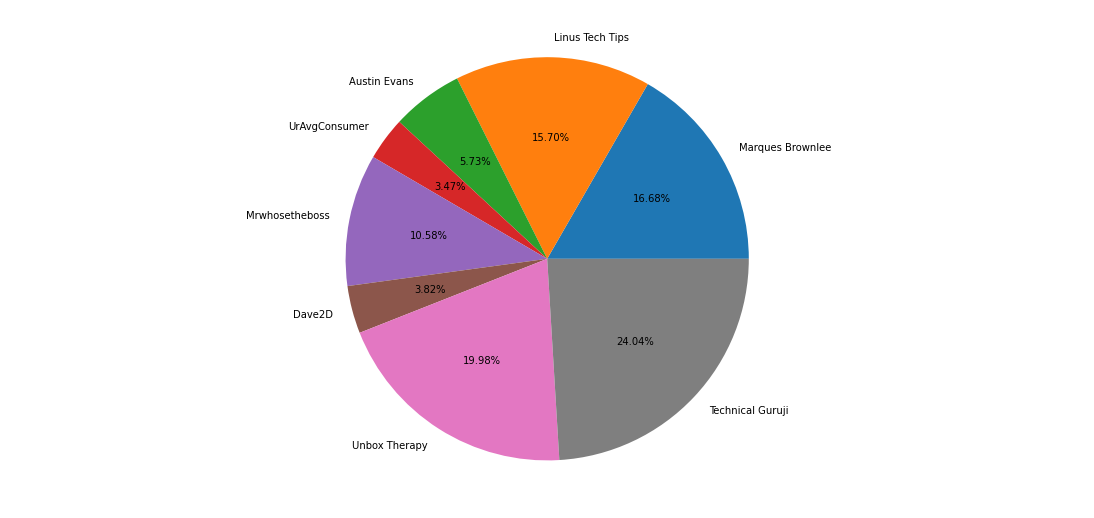

In [9]:
fig = plt.figure(figsize =(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(channeldf['Channel_subcount'], labels = channeldf['Channel_name'],autopct='%1.2f%%')
plt.show()

#Total number of videos uploaded on channel

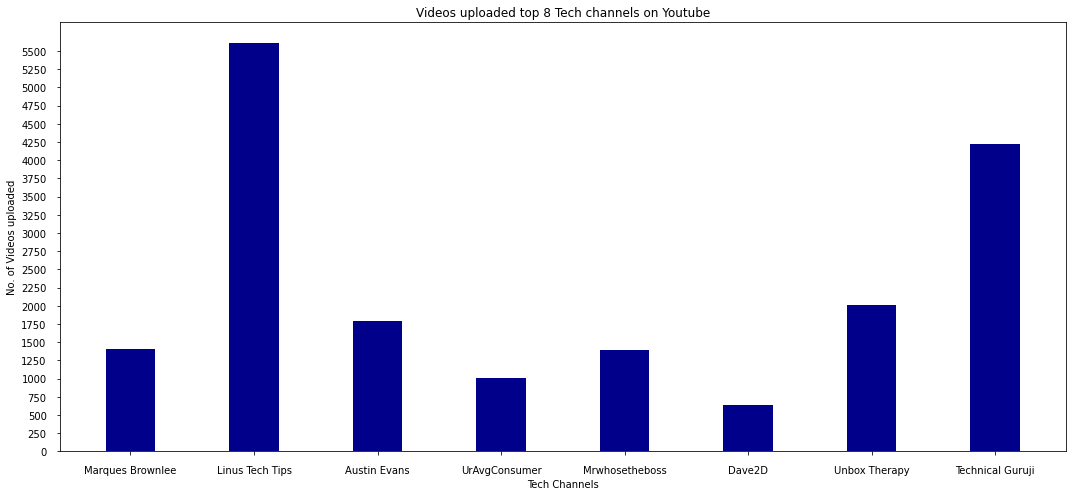

In [10]:
fig, ax = plt.subplots(figsize =(15, 7))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_vidcount'], color ='darkblue',
        width = 0.4,)
step_value = 250
plt.yticks(np.arange(0, max(channeldf['Channel_vidcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of Videos uploaded")
plt.title("Videos uploaded top 8 Tech channels on Youtube")
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

#Relationship between channel subscriber count and View count with total video count as hue parameter

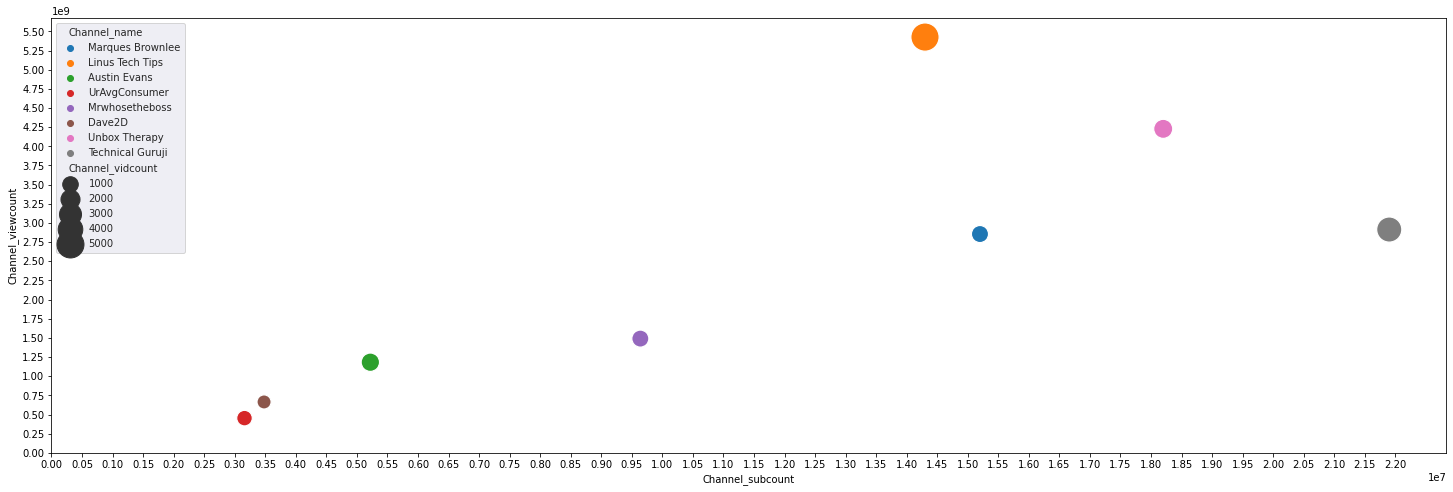

In [11]:
fig, ax = plt.subplots(figsize =(25, 8))
sns.set_style("darkgrid")
sns.scatterplot(data=channeldf, x=channeldf['Channel_subcount'], y=channeldf['Channel_viewcount'], size= channeldf['Channel_vidcount'], hue=channeldf['Channel_name'], alpha=1, sizes=(200,800))
step_value = 500000
step = 250000000
plt.xticks(np.arange(0, max(channeldf['Channel_subcount']) + step_value, step_value))
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']) + step, step))
# show the graph
plt.show()

#Finding Correlation between Subcriber Count, View Count & Total Video Count

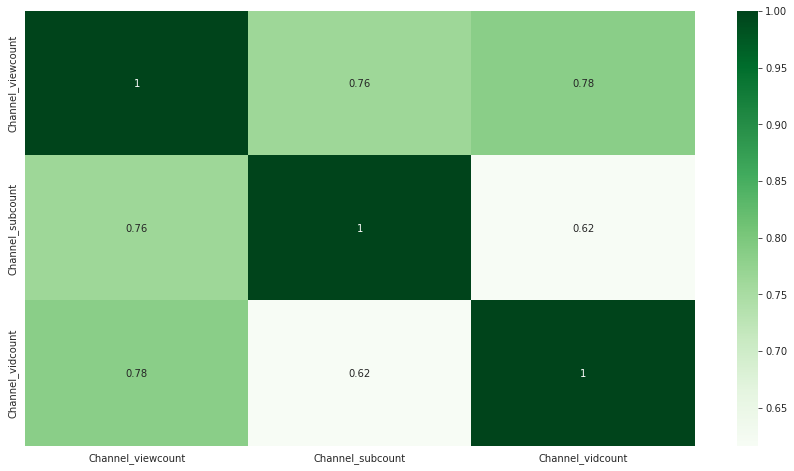

In [12]:

fig, ax = plt.subplots(figsize =(15, 8))
corr_matrix=channeldf.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='Greens', annot=True)

# Working on Video Details

In [13]:
videodf = pd.read_csv('/content/VideoDetails.csv',index_col='Unnamed: 0')


In [14]:
videodf.head()


,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,tqaVPn4YFaY,2022-01-16T16:29:45Z,Unbox Therapy,My Tesla Model S Plaid has arrived. What a tim...,0
1,Es1Uolu0chc,2022-01-15T18:07:18Z,Unbox Therapy,Huawei is finally back in the studio with some...,1
2,xXpWulEEhGw,2022-01-10T17:45:16Z,Unbox Therapy,This is the new ASUS ROG Flow Z13 it packs RTX...,2
3,JpV0KHGqn_w,2022-01-07T03:20:05Z,Unbox Therapy,Unboxing the new Realme GT 2 Pro and checking ...,3
4,9zQq-3Kn0uM,2021-12-31T20:22:33Z,Unbox Therapy,Please see below for contest details: (open to...,4


#Type conversion

In [15]:
videodf['Video_published_date'] = pd.to_datetime(videodf['Video_published_date'])

In [16]:
videodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18282 entries, 0 to 18281
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Video_id              18282 non-null  object             
 1   Video_published_date  18282 non-null  datetime64[ns, UTC]
 2   Channel_name          18282 non-null  object             
 3   Video_description     18272 non-null  object             
 4   Video_position        18282 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 857.0+ KB


Updated Datetime type

In [17]:
videodf.head()

,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,tqaVPn4YFaY,2022-01-16 16:29:45+00:00,Unbox Therapy,My Tesla Model S Plaid has arrived. What a tim...,0
1,Es1Uolu0chc,2022-01-15 18:07:18+00:00,Unbox Therapy,Huawei is finally back in the studio with some...,1
2,xXpWulEEhGw,2022-01-10 17:45:16+00:00,Unbox Therapy,This is the new ASUS ROG Flow Z13 it packs RTX...,2
3,JpV0KHGqn_w,2022-01-07 03:20:05+00:00,Unbox Therapy,Unboxing the new Realme GT 2 Pro and checking ...,3
4,9zQq-3Kn0uM,2021-12-31 20:22:33+00:00,Unbox Therapy,Please see below for contest details: (open to...,4


#Group by year
Group count of videos uploaded each year for respective Youtube channel

In [33]:
def lineplot(colname):
  plotdata = videodf[videodf['Channel_name'] == colname]
  plotdata['Video_published_date'] = plotdata['Video_published_date'].dt.year
  plotdata = plotdata.groupby('Video_published_date').count()
  plotdata.drop(index=2022, inplace=True)
  return(plotdata.index,plotdata['Video_id'],plotdata)

#Using line graph--subplots to display all channel upload frequency by years

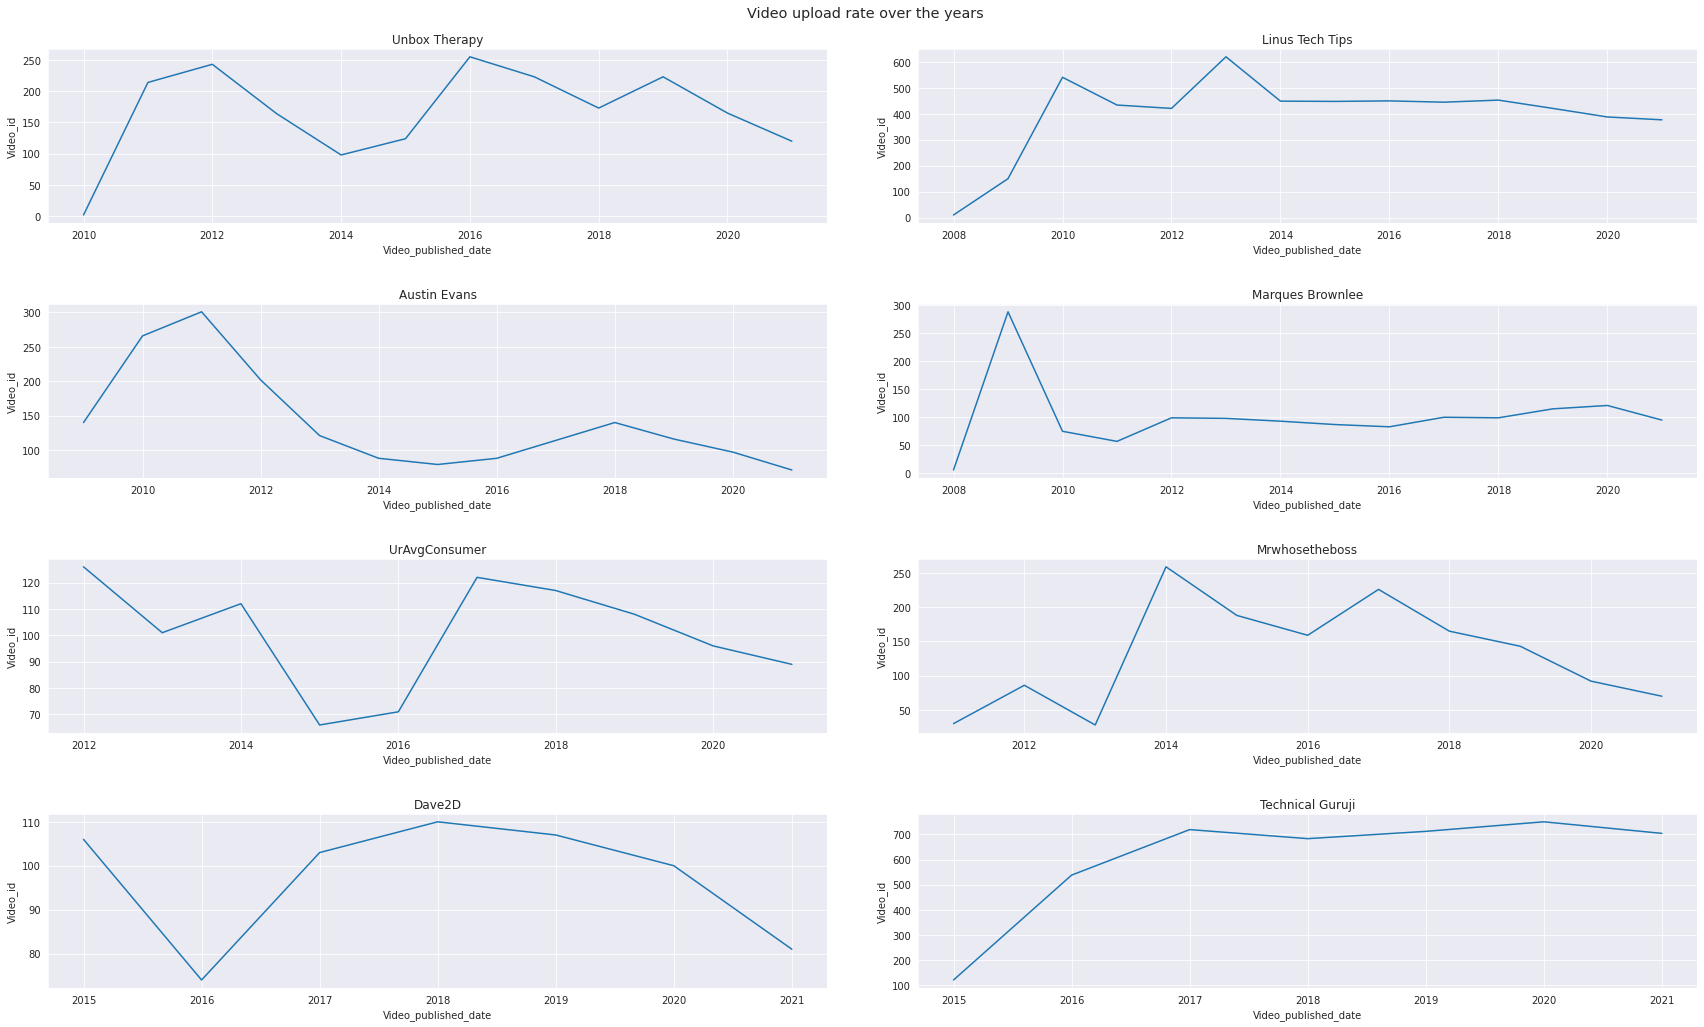

In [37]:
fig, axes = plt.subplots(4, 2, figsize=(25, 15))
sns.set_theme(style="darkgrid")
fig.tight_layout(pad=5.0)
fig.suptitle('Video upload rate over the years')


X,Y,plotdata = lineplot('Unbox Therapy')
sns.lineplot(ax=axes[0, 0], x = X, y=Y,data = plotdata, markers ='+')
axes[0][0].set_title('Unbox Therapy')


X,Y,plotdata = lineplot('Linus Tech Tips')
sns.lineplot(ax=axes[0, 1], x = X, y=Y,data = plotdata, markers ='+')
axes[0][1].set_title('Linus Tech Tips')


X,Y,plotdata = lineplot('Austin Evans')
sns.lineplot(ax=axes[1, 0], x = X, y=Y,data = plotdata, markers ='+')
axes[1][0].set_title('Austin Evans')


X,Y,plotdata = lineplot('Marques Brownlee')
sns.lineplot(ax=axes[1, 1], x = X, y=Y,data = plotdata, markers ='+')
axes[1][1].set_title('Marques Brownlee')


X,Y,plotdata = lineplot('UrAvgConsumer')
sns.lineplot(ax=axes[2, 0], x = X, y=Y,data = plotdata, markers ='+')
axes[2][0].set_title('UrAvgConsumer')


X,Y,plotdata = lineplot('Mrwhosetheboss')
sns.lineplot(ax=axes[2, 1], x = X, y=Y,data = plotdata, markers ='+')
axes[2][1].set_title('Mrwhosetheboss')


X,Y,plotdata = lineplot('Dave2D')
sns.lineplot(ax=axes[3, 0], x = X, y=Y,data = plotdata, markers ='+')
axes[3][0].set_title('Dave2D')


X,Y,plotdata = lineplot('Technical Guruji')
sns.lineplot(ax=axes[3, 1], x = X, y=Y,data = plotdata, markers ='+')
axes[3][1].set_title('Technical Guruji')
plt.show()